<ipython-input-1-aae8d40f14d5>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").mean()


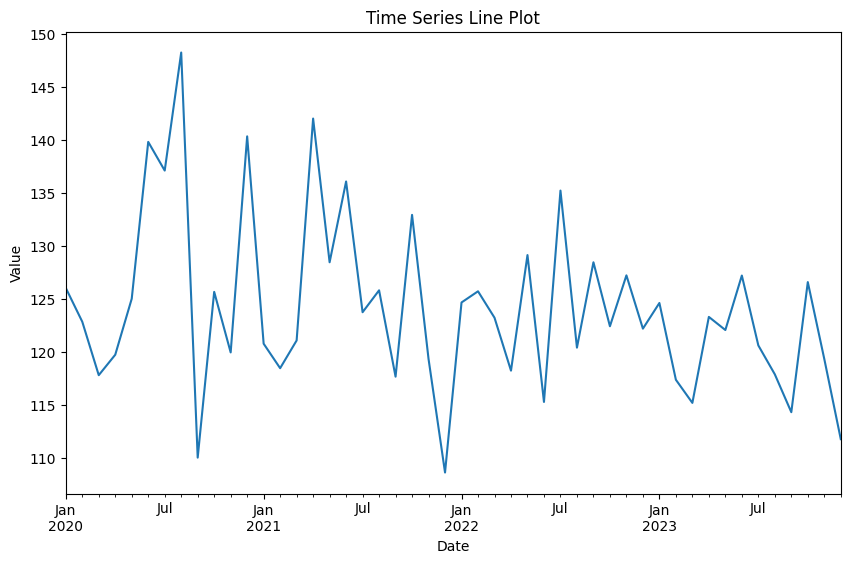

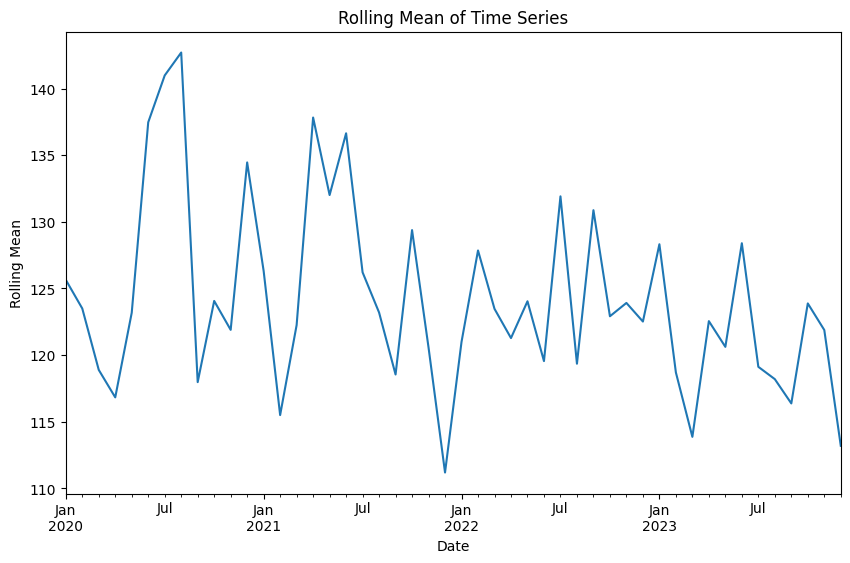

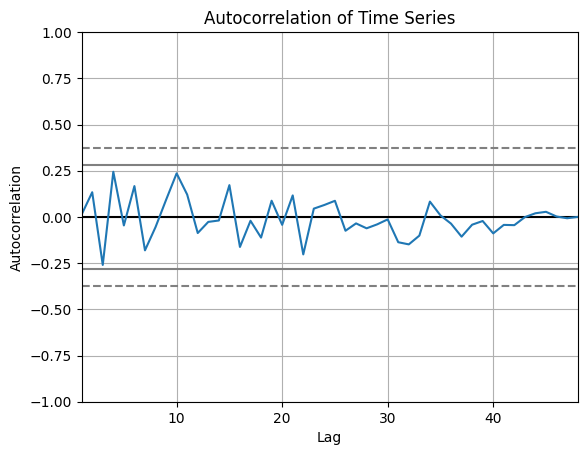

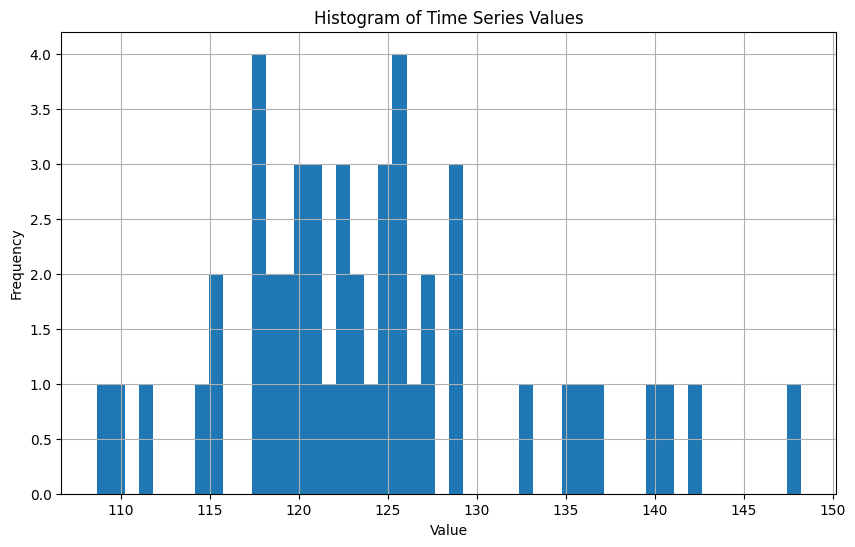

<ipython-input-1-aae8d40f14d5>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weekly["Value"].fillna(df_weekly["Value"].interpolate(), inplace=True)


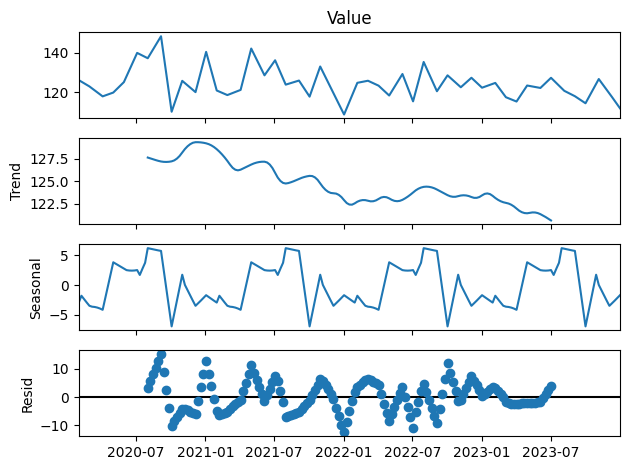

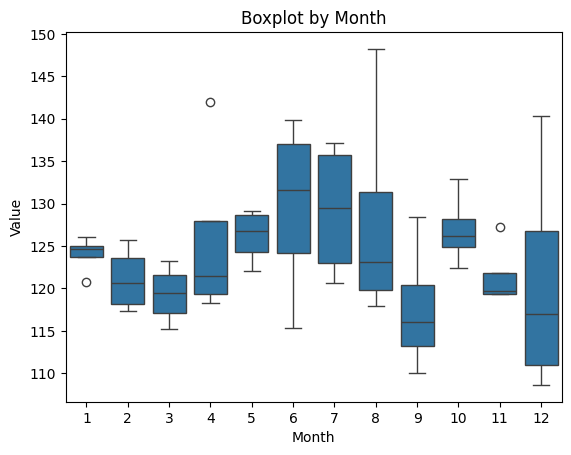

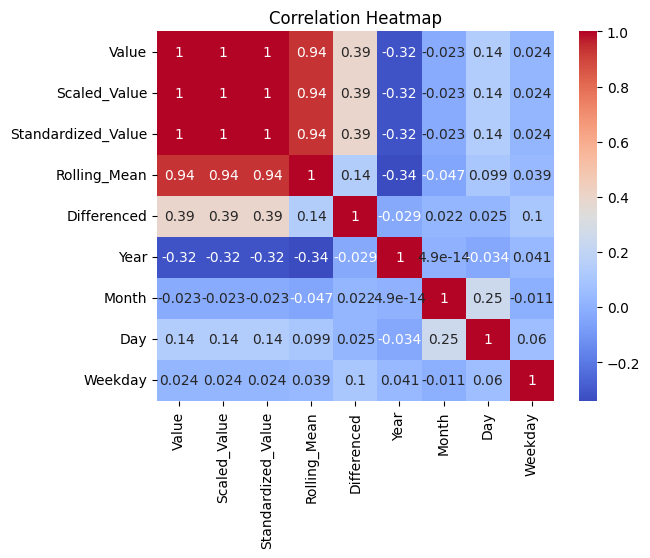

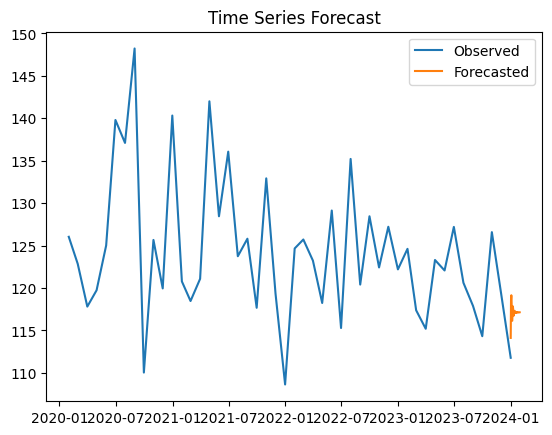

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
date_rng = pd.date_range(start="2020-01-01", end="2023-12-31", freq="D")
np.random.seed(42)
values = np.random.randint(50, 200, size=len(date_rng)).astype(float)
values[np.random.choice(len(values), size=50, replace=False)] = np.nan
df = pd.DataFrame({"Date": date_rng, "Value": values})
df.set_index('Date', inplace=True)
df["Value"] = df["Value"].interpolate()
scaler = MinMaxScaler()
df["Scaled_Value"] = scaler.fit_transform(df[["Value"]])
df["Standardized_Value"] = StandardScaler().fit_transform(df[["Value"]])
df["Rolling_Mean"] = df["Value"].rolling(window=7).mean()
df["Differenced"] = df["Value"].diff()
df["Year"], df["Month"], df["Day"], df["Weekday"] = df.index.year, df.index.month, df.index.day, df.index.weekday
df = df[~df.index.duplicated(keep="first")]
Q1, Q3 = df["Value"].quantile(0.25), df["Value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df = df[(df["Value"] >= lower_bound) & (df["Value"] <= upper_bound)]
df = df.resample("M").mean()
df.to_csv("cleaned_time_series.csv")
df["Value"].plot(figsize=(10,6))
plt.title("Time Series Line Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()
df["Rolling_Mean"].plot(figsize=(10,6))
plt.title("Rolling Mean of Time Series")
plt.xlabel("Date")
plt.ylabel("Rolling Mean")
plt.show()
autocorrelation_plot(df["Value"])
plt.title("Autocorrelation of Time Series")
plt.show()
df["Value"].hist(bins=50, figsize=(10,6))
plt.title("Histogram of Time Series Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
df_weekly = df.resample("W").mean()
df_weekly["Value"].fillna(df_weekly["Value"].interpolate(), inplace=True)
decomposed = seasonal_decompose(df_weekly["Value"], model="additive", period=52)
decomposed.plot()
plt.show()
sns.boxplot(x=df.index.month, y=df["Value"])
plt.title("Boxplot by Month")
plt.xlabel("Month")
plt.ylabel("Value")
plt.show()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
model = ARIMA(df["Value"], order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
plt.plot(df.index, df["Value"], label="Observed")
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label="Forecasted")
plt.title("Time Series Forecast")
plt.legend()
plt.show()


<ipython-input-2-1af5d741f255>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(df['Value'].interpolate(), inplace=True)


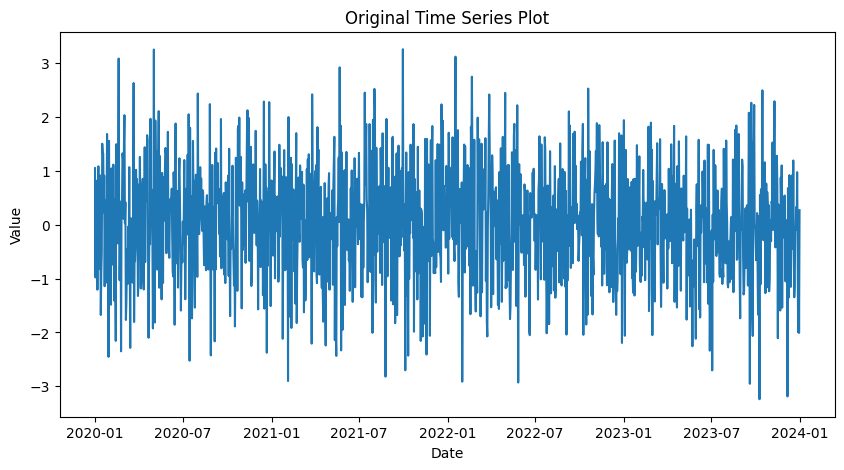

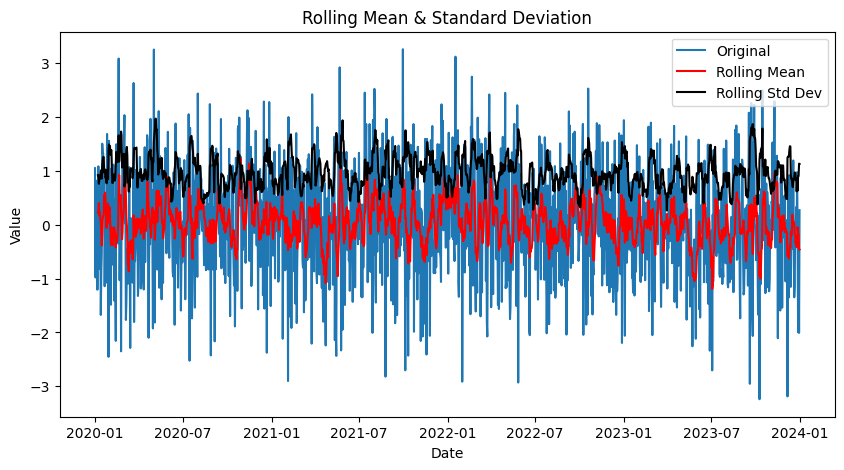

<Figure size 1000x500 with 0 Axes>

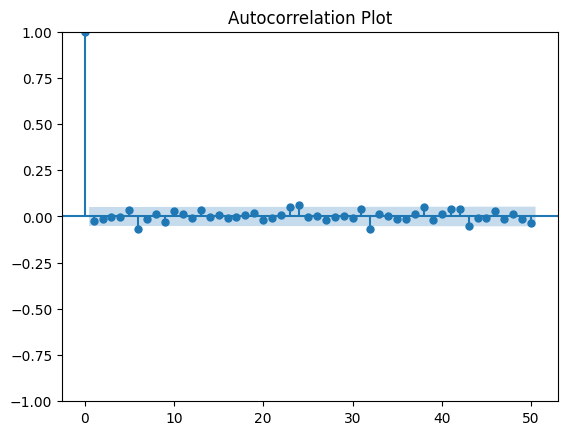

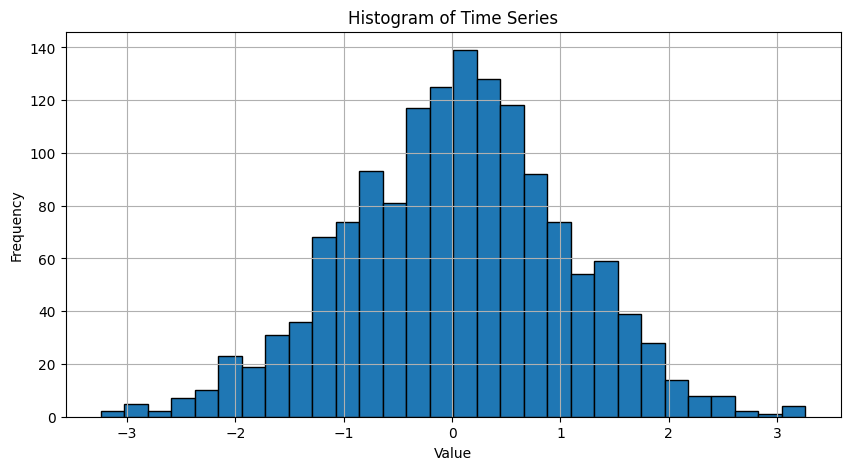

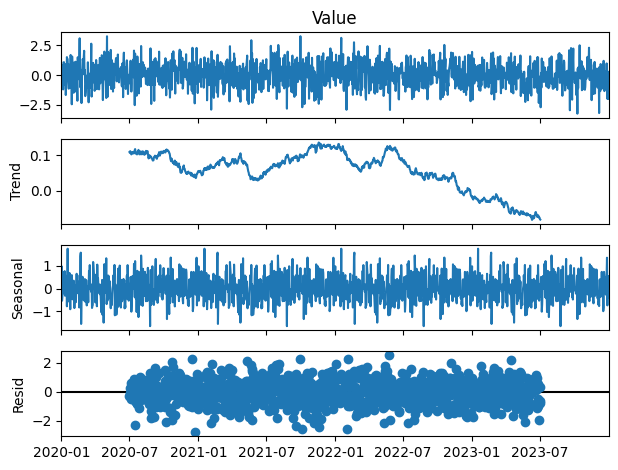

<ipython-input-2-1af5d741f255>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()  # Resample to monthly data


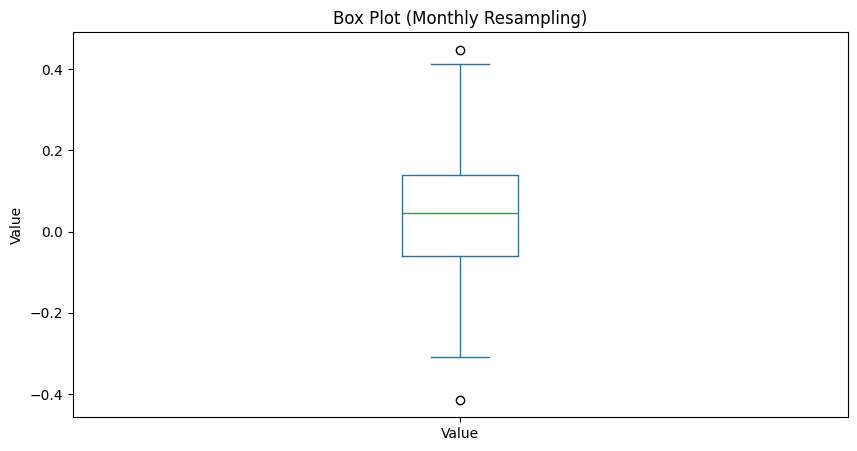

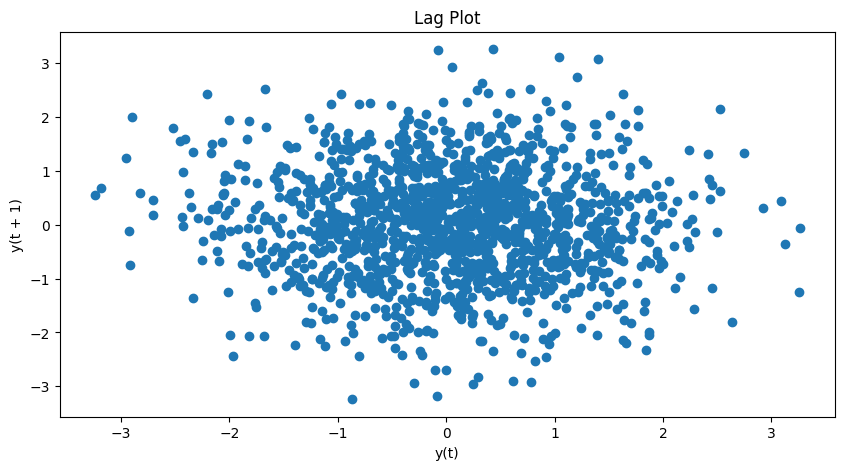

ADF Statistic: -39.11441039389907
p-value: 0.0
The time series is likely stationary.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a sample time series data (replace with your data file)
date_rng = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
df = pd.DataFrame(date_rng, columns=['Date'])
df['Value'] = np.random.randn(len(df))  # Replace this with your actual time series data
df.set_index('Date', inplace=True)

# Handling missing values by filling with interpolation
df['Value'].fillna(df['Value'].interpolate(), inplace=True)

# 1. Original Time Series Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Value'])
plt.title('Original Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# 2. Rolling Mean and Rolling Standard Deviation Plot
rolling_mean = df['Value'].rolling(window=7).mean()
rolling_std = df['Value'].rolling(window=7).std()

plt.figure(figsize=(10, 5))
plt.plot(df['Value'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='black')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# 3. Autocorrelation Plot
plt.figure(figsize=(10, 5))
plot_acf(df['Value'], lags=50)
plt.title('Autocorrelation Plot')
plt.show()

# 4. Histogram
plt.figure(figsize=(10, 5))
df['Value'].hist(bins=30, edgecolor='black')
plt.title('Histogram of Time Series')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 5. Seasonal Decomposition (Trend, Seasonality, Residuals)
decomposed = seasonal_decompose(df['Value'], model='additive', period=365)
decomposed.plot()
plt.show()

# 6. Box Plot (Monthly Resampling)
df_monthly = df.resample('M').mean()  # Resample to monthly data
plt.figure(figsize=(10, 5))
df_monthly['Value'].plot.box()
plt.title('Box Plot (Monthly Resampling)')
plt.ylabel('Value')
plt.show()

# 7. Lag Plot (Lag of 1)
from pandas.plotting import lag_plot
plt.figure(figsize=(10, 5))
lag_plot(df['Value'])
plt.title('Lag Plot')
plt.show()

# Check for Stationarity using Augmented Dickey-Fuller Test
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The time series is likely stationary.")
    else:
        print("The time series is likely non-stationary.")

check_stationarity(df['Value'])


<ipython-input-3-f016d6d3d741>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(df['Value'].interpolate(), inplace=True)


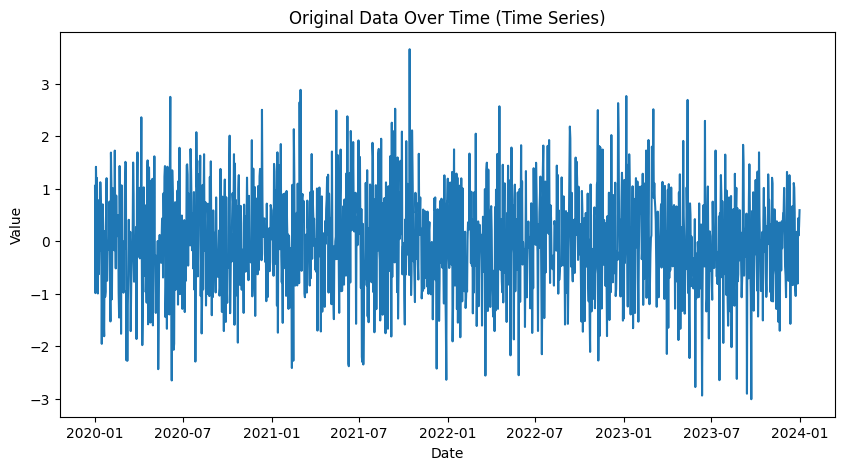

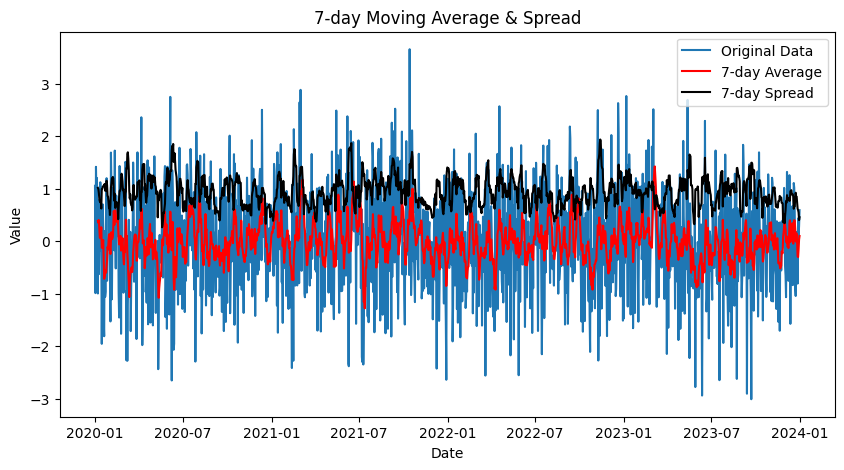

<Figure size 1000x500 with 0 Axes>

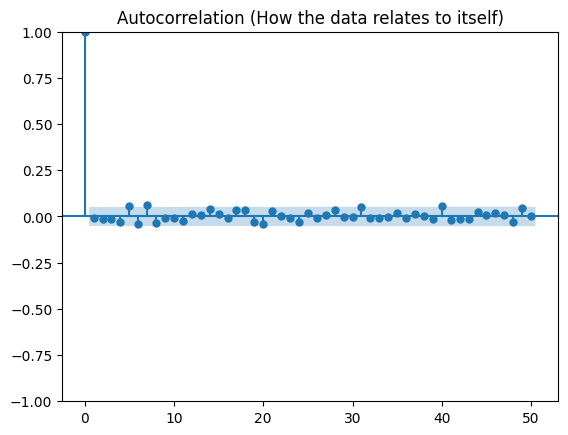

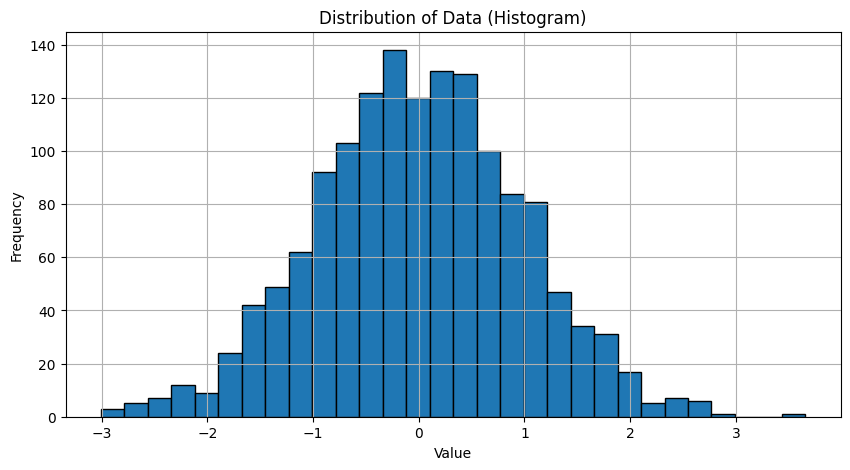

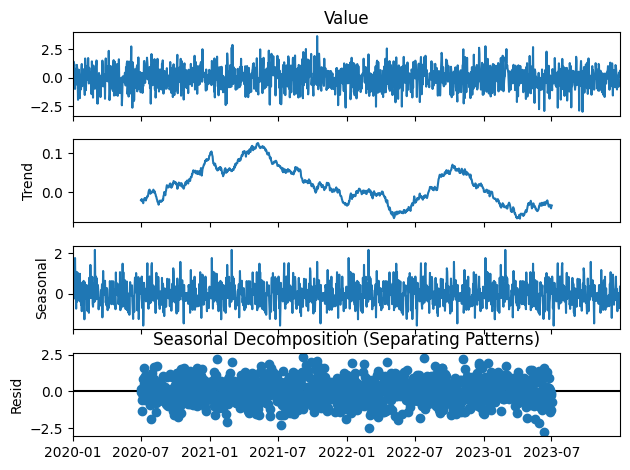

<ipython-input-3-f016d6d3d741>:60: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


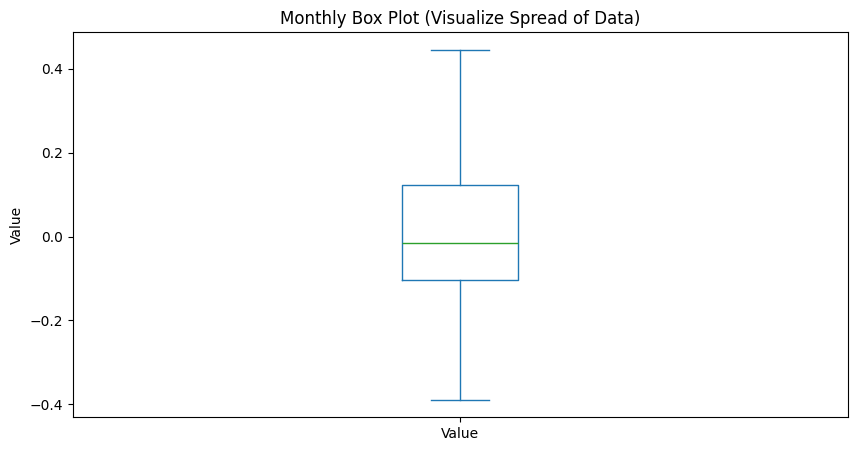

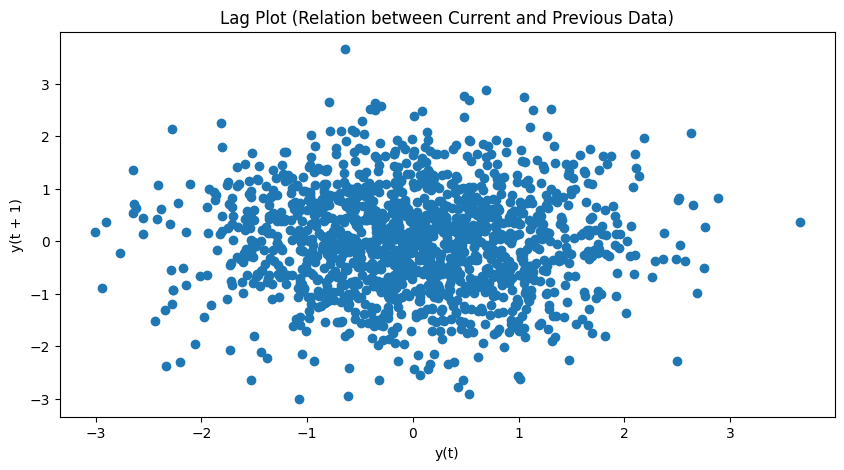

ADF Statistic: -13.856560852316989
p-value: 6.850664676116358e-26
The data seems to be stable (stationary).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a sample time series data (replace with your data file)
date_rng = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
df = pd.DataFrame(date_rng, columns=['Date'])
df['Value'] = np.random.randn(len(df))  # Replace with your actual time series data
df.set_index('Date', inplace=True)

# Handling missing values by filling with interpolation
df['Value'].fillna(df['Value'].interpolate(), inplace=True)

# 1. Original Time Series Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Value'])
plt.title('Original Data Over Time (Time Series)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# 2. Rolling Mean and Rolling Standard Deviation Plot
rolling_mean = df['Value'].rolling(window=7).mean()
rolling_std = df['Value'].rolling(window=7).std()

plt.figure(figsize=(10, 5))
plt.plot(df['Value'], label='Original Data')
plt.plot(rolling_mean, label='7-day Average', color='red')
plt.plot(rolling_std, label='7-day Spread', color='black')
plt.title('7-day Moving Average & Spread')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# 3. Autocorrelation Plot
plt.figure(figsize=(10, 5))
plot_acf(df['Value'], lags=50)
plt.title('Autocorrelation (How the data relates to itself)')
plt.show()

# 4. Histogram (How data is spread out)
plt.figure(figsize=(10, 5))
df['Value'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Data (Histogram)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 5. Seasonal Decomposition (Separating trend and patterns)
decomposed = seasonal_decompose(df['Value'], model='additive', period=365)
decomposed.plot()
plt.title('Seasonal Decomposition (Separating Patterns)')
plt.show()

# 6. Monthly Box Plot (To see spread of data each month)
df_monthly = df.resample('M').mean()
plt.figure(figsize=(10, 5))
df_monthly['Value'].plot.box()
plt.title('Monthly Box Plot (Visualize Spread of Data)')
plt.ylabel('Value')
plt.show()

# 7. Lag Plot (How current value relates to previous value)
from pandas.plotting import lag_plot
plt.figure(figsize=(10, 5))
lag_plot(df['Value'])
plt.title('Lag Plot (Relation between Current and Previous Data)')
plt.show()

# Check for Stationarity using Augmented Dickey-Fuller Test
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The data seems to be stable (stationary).")
    else:
        print("The data seems to have trends (non-stationary).")

check_stationarity(df['Value'])


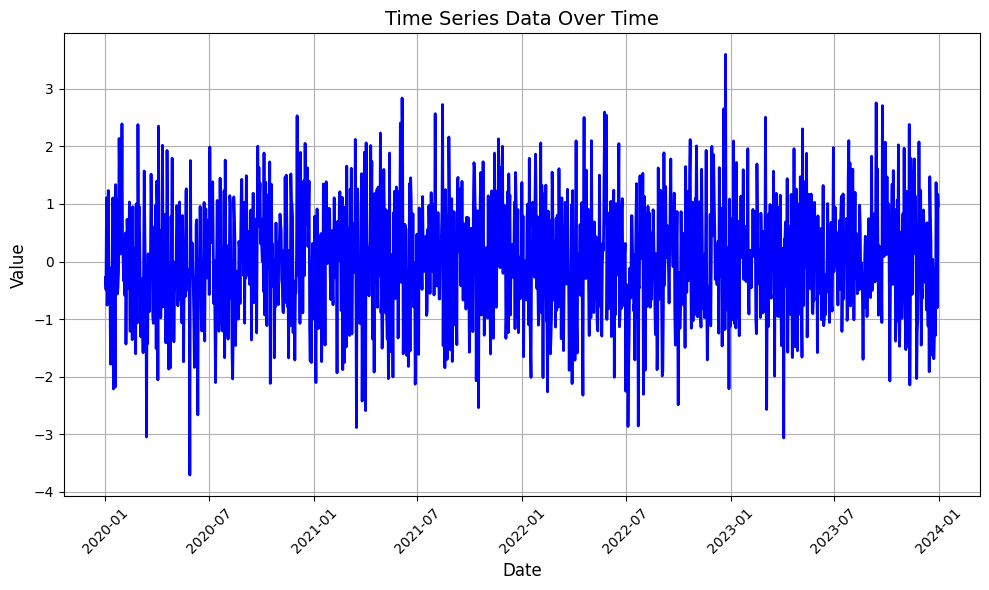

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

date_rng = pd.date_range(start="2020-01-01", end="2023-12-31", freq="D")
df = pd.DataFrame(date_rng, columns=["Date"])
df["Value"] = np.random.randn(len(df))

plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Value"], label="Value", color="blue", linewidth=2)
plt.title("Time Series Data Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
